In [29]:
import gym
import numpy as np
from stable_baselines.sac.policies import MlpPolicy as MlpPolicy_SAC
from stable_baselines import SAC
from citylearn import  CityLearn
import matplotlib.pyplot as plt
from pathlib import Path
import time

In [30]:
# Central agent controlling one of the buildings using the OpenAI Stable Baselines
climate_zone = 1
data_path = Path("data/Climate_Zone_"+str(climate_zone))
building_attributes = data_path / 'building_attributes.json'
weather_file = data_path / 'weather_data.csv'
solar_profile = data_path / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
building_ids = ['Building_3']
objective_function = ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption','quadratic']
env = CityLearn(data_path, building_attributes, weather_file, solar_profile, building_ids, buildings_states_actions = building_state_actions, cost_function = objective_function, central_agent = True, verbose = 1)


In [4]:
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)
start = time.time()
model.learn(total_timesteps=8760*7, log_interval=1000)
print(time.time()-start)

obs = env.reset()
dones = False
counter = []
while dones==False:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    counter.append(rewards)
env.cost()

Cumulated reward: -75322.69545645938
Cumulated reward: -63096.10963409168
Cumulated reward: -60850.54428020531
Cumulated reward: -51874.02342074565
Cumulated reward: -43346.23913049447
Cumulated reward: -41480.00503488975
Cumulated reward: -41316.56278503711
3006.1538264751434
Cumulated reward: -40469.86398291042


{'ramping': 1.6393113380698565,
 '1-load_factor': 1.1170150494338251,
 'average_daily_peak': 1.1189232326250598,
 'peak_demand': 1.186965270290675,
 'net_electricity_consumption': 0.9631310841840236,
 'quadratic': 1.0129643843653866,
 'total': 1.1730517264948046}

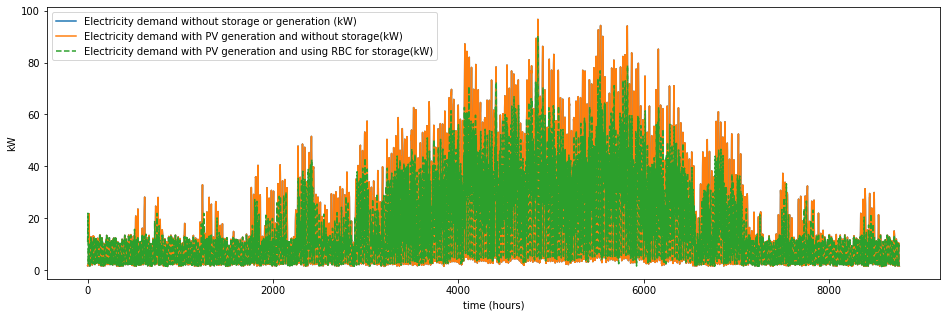

In [6]:
# Plotting winter operation
interval = range(0,8759)
plt.figure(figsize=(16,5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)', 'Electricity demand with PV generation and without storage(kW)', 'Electricity demand with PV generation and using SAC for storage(kW)'])

In [8]:
# Central agent controlling all the buildings using the OpenAI Stable Baselines
climate_zone = 1
data_path = Path("data/Climate_Zone_"+str(climate_zone))
building_attributes = data_path / 'building_attributes.json'
weather_file = data_path / 'weather_data.csv'
solar_profile = data_path / 'solar_generation_1kW.csv'
building_state_actions = 'buildings_state_action_space.json'
building_ids = ['Building_1',"Building_2","Building_3","Building_4","Building_5","Building_6","Building_7","Building_8","Building_9"]
objective_function = ['ramping','1-load_factor','average_daily_peak','peak_demand','net_electricity_consumption']
env = CityLearn(data_path, building_attributes, weather_file, solar_profile, building_ids, buildings_states_actions = building_state_actions, cost_function = objective_function, central_agent = True, verbose = 1)


In [9]:
# model = SAC(MlpPolicy_SAC, env, verbose=0, gamma=0.985, learning_rate=0.01, learning_starts=8759)
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.985, batch_size=2048, learning_starts=8759)

start = time.time()
model.learn(total_timesteps=8760*5, log_interval=1000)
print(time.time()-start)

obs = env.reset()
dones = False
counter = []
while dones==False:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    counter.append(rewards)
env.cost()

Cumulated reward: -3832380.1038466487
Cumulated reward: -3438281.519954133
Cumulated reward: -3338712.5852738637
Cumulated reward: -3314459.4593346254
Cumulated reward: -3385487.1852294086
2488.7272272109985
Cumulated reward: -3397626.7143225376


{'ramping': 1.180682767576506,
 '1-load_factor': 0.9730867459732838,
 'average_daily_peak': 0.9379933218933673,
 'peak_demand': 1.104652203234591,
 'net_electricity_consumption': 1.0228961171302156,
 'total': 1.0438622311615926}

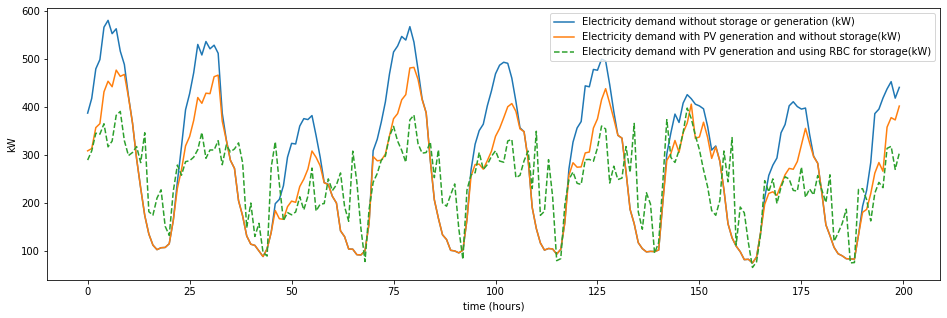

In [13]:
# Plotting winter operation
interval = range(5000,5200)
plt.figure(figsize=(16,5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)', 'Electricity demand with PV generation and without storage(kW)', 'Electricity demand with PV generation and using SAC for storage(kW)'])

In [35]:
# model = SAC(MlpPolicy_SAC, env, verbose=0, gamma=0.985, learning_rate=0.01, learning_starts=8759)
model = SAC(MlpPolicy_SAC, env, verbose=0, learning_rate=0.01, gamma=0.99, tau=3e-4, batch_size=2048, learning_starts=8759)

start = time.time()
model.learn(total_timesteps=8760*4, log_interval=1000)
print(time.time()-start)

obs = env.reset()
dones = False
counter = []
while dones==False:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    counter.append(rewards)
env.cost()

-3785913.578548175
-3580777.7577081
-3572369.890670182
-3428326.0819872543
2610.571026325226
-3434378.423634182


{'ramping': 0.8070936109708158,
 '1-load_factor': 0.9736037768134067,
 'average_daily_peak': 0.9373086087369501,
 'peak_demand': 1.1431965042082484,
 'net_electricity_consumption': 1.008834019241458,
 'total': 0.9740073039941759}

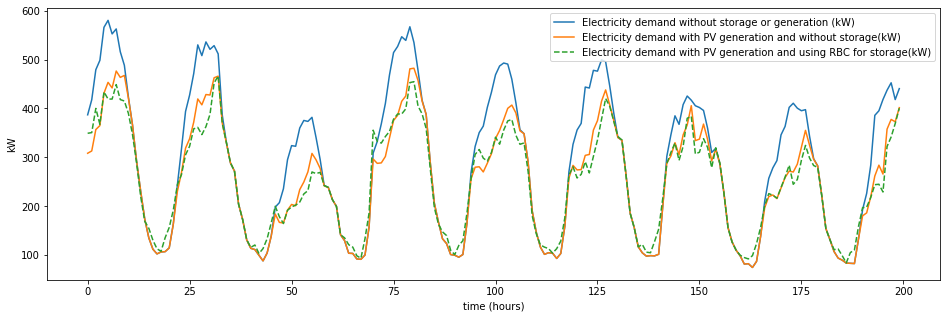

In [37]:
# Plotting winter operation
interval = range(5000,5200)
plt.figure(figsize=(16,5))
plt.plot(env.net_electric_consumption_no_pv_no_storage[interval])
plt.plot(env.net_electric_consumption_no_storage[interval])
plt.plot(env.net_electric_consumption[interval], '--')
plt.xlabel('time (hours)')
plt.ylabel('kW')
plt.legend(['Electricity demand without storage or generation (kW)', 'Electricity demand with PV generation and without storage(kW)', 'Electricity demand with PV generation and using SAC for storage(kW)'])